In [1]:
#Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset

df=pd.read_csv('diabetes.csv')
df.head()
df2=df['Outcome']

In [3]:
#null values are represened as 0
#converting 0 to nan

df=df.drop(['DiabetesPedigreeFunction'],axis=1)
df1=df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']].replace(0,np.nan)
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,6.0,148.0,72.0,35.0,NaN,33.6,50
1,1.0,85.0,66.0,29.0,NaN,26.6,31
2,8.0,183.0,64.0,NaN,NaN,23.3,32
3,1.0,89.0,66.0,23.0,94.0,28.1,21
4,NaN,137.0,40.0,35.0,168.0,43.1,33


In [4]:
df1=df1.merge(df2,how='inner',left_index=True,right_index=True)
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,33,1


Text(0, 0.5, 'counts')

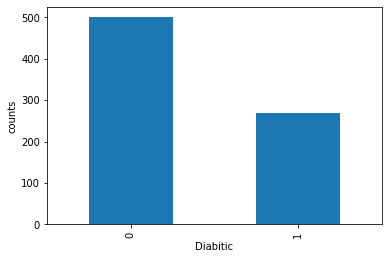

In [5]:
df['Outcome'].value_counts().plot(kind='bar')
plt.xlabel('Diabitic')
plt.ylabel('counts')

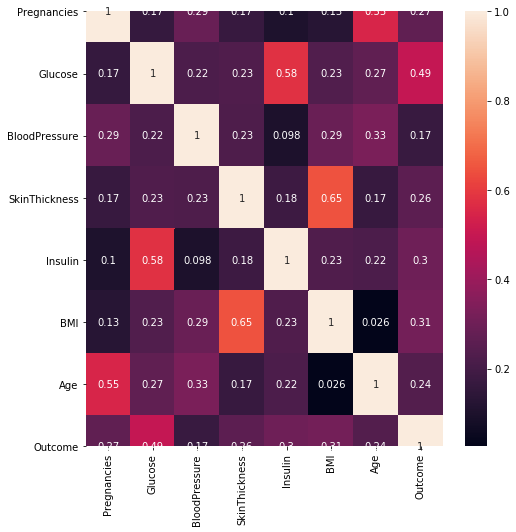

In [6]:
#Plotted the heatmapto check the correlation

plt.figure(figsize=(8,8))
sns.heatmap(df1.corr(),annot=True)

In [7]:
# General Statistics of our data

df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
count,657.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000
mean,4.494673,121.686763,72.405184,29.153420,155.548223,32.457464,33.240885,0.348958
std,3.217291,30.535641,12.382158,10.476982,118.775855,6.924988,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,21.000000,0.000000
25%,2.000000,99.000000,64.000000,22.000000,76.250000,27.500000,24.000000,0.000000
50%,4.000000,117.000000,72.000000,29.000000,125.000000,32.300000,29.000000,0.000000
75%,7.000000,141.000000,80.000000,36.000000,190.000000,36.600000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,81.000000,1.000000


In [8]:
#Divided the age into 4 age groups for better results

df1['Age']=pd.cut(df1['Age'],bins=[20,30,45,60,82],labels=[1,2,3,4])

In [9]:
#Glucose : filling null values of glucose by median wrt their Age

df1['Glucose'].fillna(df1.groupby('Age')['Glucose'].transform('median'),inplace=True)

#Divided the glucose values into two bins good(0-140 is normal range ) and bad

df1['Glucose']=pd.cut(df1['Glucose'],bins=[0,140,200],labels=['good','bad'])
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6.0,bad,72.0,35.0,NaN,33.6,3,1
1,1.0,good,66.0,29.0,NaN,26.6,2,0
2,8.0,bad,64.0,NaN,NaN,23.3,2,1
3,1.0,good,66.0,23.0,94.0,28.1,1,0
4,NaN,good,40.0,35.0,168.0,43.1,2,1


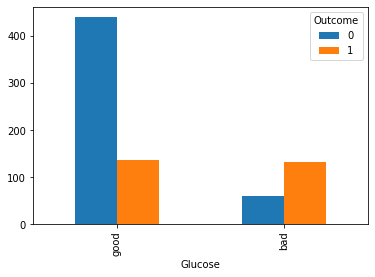

In [10]:
a=pd.crosstab(df1['Glucose'],df['Outcome'])
a.plot(kind='bar')


In [11]:
# Filling the null values with average values

df1['Pregnancies'].fillna(3,inplace=True)

df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6.0,bad,72.0,35.0,NaN,33.6,3,1
1,1.0,good,66.0,29.0,NaN,26.6,2,0
2,8.0,bad,64.0,NaN,NaN,23.3,2,1
3,1.0,good,66.0,23.0,94.0,28.1,1,0
4,3.0,good,40.0,35.0,168.0,43.1,2,1


In [12]:
#Fill null values of BP with their median values

y=df1['BloodPressure'].median()
df1['BloodPressure'].fillna(y,inplace=True)

#It is not possible to have BP less than 40 so replace the BP value which is less than 40 by 40

df1['BloodPressure']=df1['BloodPressure'].where(df1['BloodPressure']>40,40)
df1['BloodPressure']=pd.cut(df1['BloodPressure'],bins=[22,40,80,110,122],labels=['vlow','low','avg','high'])

In [13]:
#As insulin is highly corelated with glucose so filling the null values of insulin by its median wrt to glucose

df1['Insulin'].fillna(df1.groupby('Glucose')['Insulin'].transform('median'),inplace=True)
x=df1['BMI'].median()
df1['BMI'].fillna(x,inplace=True)


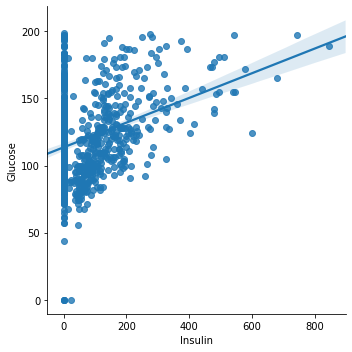

In [14]:
sns.lmplot('Insulin','Glucose',data=df)

In [15]:
z=df1['SkinThickness'].median()
df1['SkinThickness'].fillna(z,inplace=True)

In [17]:
df1.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Age', 'Outcome'],
      dtype='object')

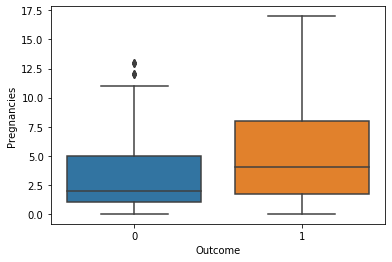

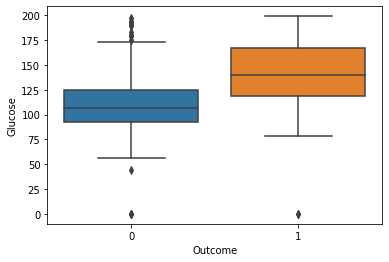

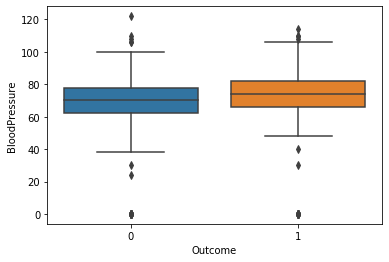

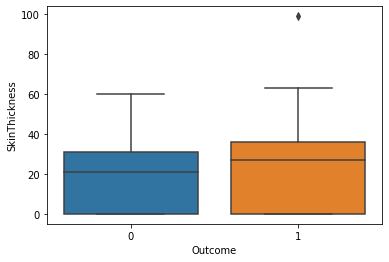

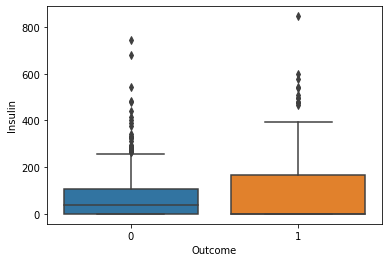

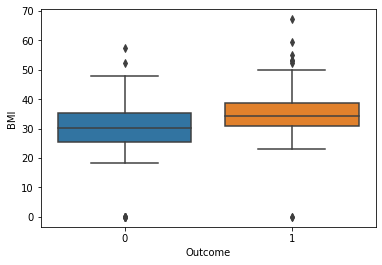

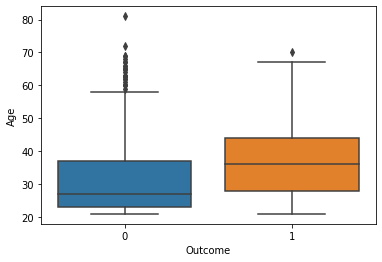

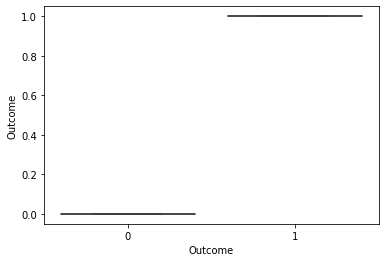

In [20]:
li1=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Age', 'Outcome']
for i in li1:
    sns.boxplot(df['Outcome'],df[i])
    plt.xlabel('Outcome')
    plt.ylabel(i)
    plt.show()

In [17]:
df1.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Age              0
Outcome          0
dtype: int64

In [18]:
#Converting the categorical features into 1,2,3...

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['Glucose']=le.fit_transform(df1['Glucose'])
df1['BloodPressure']=le.fit_transform(df1['BloodPressure'])

In [19]:
df1['Pregnancies']=df1['Pregnancies'].astype('int64')
df1['BMI']=df1['BMI'].astype('int64')
df1['SkinThickness']=df1['SkinThickness'].astype('int64')
df1['Insulin']=df1['Insulin'].astype('int64')
df1['BMI']=df1['BMI'].astype('int64')
df1['Age']=df1['Age'].astype('int64')

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
Pregnancies      768 non-null int64
Glucose          768 non-null int32
BloodPressure    768 non-null int32
SkinThickness    768 non-null int64
Insulin          768 non-null int64
BMI              768 non-null int64
Age              768 non-null int64
Outcome          768 non-null int64
dtypes: int32(2), int64(6)
memory usage: 42.1 KB


In [21]:
#Removing the outliers

q3=df1.quantile(0.75)
q1=df1.quantile(0.25)
IQR=q3-q1
df1=df1[~((df1<(q1-1.5*IQR))|(df1>(q3+1.5*IQR))).any(axis=1)]

# Feature Selection 

In [22]:
# splitting the columns into independent and target variables

x=df1[['Pregnancies','SkinThickness','Insulin','BMI','Age']]
y=df1['Outcome']

In [23]:
# Splitting the dataset into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [24]:
#Selecting best features having p values less than 0.05

from sklearn.feature_selection import f_classif
sel2=f_classif(x_train,y_train)
p_value=pd.Series(sel2[1])
p_value.index=x_train.columns
sel13=p_value[p_value<0.05]
sel13

Pregnancies      0.001259
SkinThickness    0.000482
Insulin          0.002606
BMI              0.000076
Age              0.000057
dtype: float64

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [26]:
from sklearn.feature_selection import SelectFromModel
sel=SelectFromModel(LogisticRegression(penalty='l1',C=0.05,solver='liblinear'))
sel.fit(x_train,y_train)
sel.get_support()

array([ True,  True,  True,  True, False])

In [27]:
sel=SelectFromModel(RandomForestClassifier(random_state=0,n_jobs=-1))
sel.fit(x_train,y_train)
sel.get_support()

C:\Users\User-1\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([False,  True, False,  True, False])

In [28]:
from sklearn.feature_selection import RFE
sel=RFE(RandomForestClassifier(random_state=0,n_jobs=-1),n_features_to_select=3)
sel.fit(x_train,y_train)
sel.get_support()

C:\Users\User-1\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User-1\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User-1\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([ True,  True, False,  True, False])

In [29]:
#Selecting features based on roc auc score

from sklearn import metrics
roc_auc=[]
for feature in x_train.columns:
    rfc=RandomForestClassifier(random_state=5)
    rfc.fit(x_train[feature].to_frame(),y_train)
    pred9=rfc.predict(x_test[feature].to_frame())
    roc_auc.append(metrics.roc_auc_score(y_test,pred9))

C:\Users\User-1\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User-1\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User-1\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User-1\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User-1\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

In [30]:
roc_values=pd.Series(roc_auc)
roc_values.index=x_train.columns
roc=roc_values[roc_values>0.5]
roc

Pregnancies    0.517217
BMI            0.505022
dtype: float64

In [32]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs=SFS(RandomForestClassifier(random_state=0),
        k_features=5,
        forward= False,
        floating=False,
        verbose=2,
        cv=4,
        scoring='accuracy',
        n_jobs=-1
       
       ).fit(x_train,y_train)

C:\Users\User-1\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User-1\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User-1\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User-1\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [33]:
sfs.k_feature_names_

('Pregnancies', 'SkinThickness', 'Insulin', 'BMI', 'Age')

# Training The Model

### KNeighbors Classifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
pred1=knn.predict(x_test)
print(metrics.accuracy_score(y_test,pred1))
print(metrics.confusion_matrix(y_test,pred1))

0.8282828282828283
[[78  4]
 [13  4]]


In [35]:
for k in range(1,32):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    pred1=knn.predict(x_test)
    (metrics.accuracy_score(y_test,pred1))

### Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import binarize
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
pred2=logreg.predict(x_test)
y_prob=logreg.predict_proba(x_test)[:,1]
#pred2=binarize([y_prob],0.35)[0]
print(metrics.accuracy_score(y_test,pred2))
print(metrics.confusion_matrix(y_test,pred2))

0.8484848484848485
[[82  0]
 [15  2]]


C:\Users\User-1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Here if person is having diabetes but if our model predicts he doesnt have diabetes is major problem so we need to decrease the false negative rate

In [50]:
pred2=binarize([y_prob],0.30)[0]
print(metrics.accuracy_score(y_test,pred2))
print(metrics.confusion_matrix(y_test,pred2))

0.7777777777777778
[[64 18]
 [ 4 13]]


### Decision Tree


In [43]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=5)
dtc.fit(x_train,y_train)
pred3=dtc.predict(x_test)
print(metrics.accuracy_score(y_test,pred3))
print(metrics.confusion_matrix(y_test,pred3))

0.7171717171717171
[[68 14]
 [14  3]]


### Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=5)
rfc.fit(x_train,y_train)
pred4=rfc.predict(x_test)
y_prob=rfc.predict_proba(x_test)[:,1]
print(metrics.accuracy_score(y_test,pred4))
print(metrics.confusion_matrix(y_test,pred4))

0.8181818181818182
[[78  4]
 [14  3]]


C:\Users\User-1\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [52]:
pred4=binarize([y_prob],0.35)[0]
print(metrics.accuracy_score(y_test,pred4))
print(metrics.confusion_matrix(y_test,pred4))

0.797979797979798
[[70 12]
 [ 8  9]]


### AdaBoost

In [45]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(random_state=5)
abc.fit(x_train,y_train)
pred5=abc.predict(x_test)
print(metrics.accuracy_score(y_test,pred5))
print(metrics.confusion_matrix(y_test,pred5))


0.7676767676767676
[[71 11]
 [12  5]]


### Gradient Boosting

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(random_state=5)
gbc.fit(x_train,y_train)
pred6=gbc.predict(x_test)
print(metrics.accuracy_score(y_test,pred6))
print(metrics.confusion_matrix(y_test,pred6))

0.7777777777777778
[[72 10]
 [12  5]]


### Ridge classifier

In [55]:
from sklearn.linear_model import RidgeClassifier
rr=RidgeClassifier()
rr.fit(x_train,y_train)
pred7=rr.predict(x_test)
print(metrics.accuracy_score(y_test,pred7))
print(metrics.confusion_matrix(y_test,pred7))

0.8383838383838383
[[79  3]
 [13  4]]


For this dataset logistic regression performed the best and we got the accuracy score as 85.85%
But our main aim was to reduce false negative rate so after decreasing false positive rate accuracy comes out to be 79%